## Setup

In [ ]:
import pandas as pd
import numpy as np

# Question 1
Please find the answers to the questions at the end of this section, after the exploratory data analysis. 

## Exploratory Data Analysis

In [ ]:
# import data
orders = pd.read_csv('shopify_data.csv')
orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
# look into how many sneakers customers are ordering at once
order_count = orders[['order_id', 'total_items']].groupby('total_items').count()
order_count.columns = ['num_orders']
order_count
# most orders only have up to 3 sneakers

,num_orders
total_items,
1,1830
2,1832
3,941
4,293
5,77
6,9
8,1
2000,17


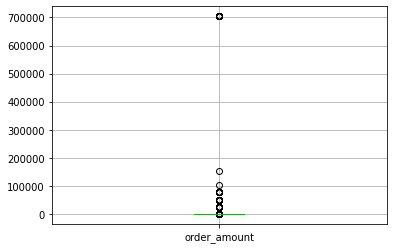

In [ ]:
# look into how much customers are spending on an order
orders.boxplot('order_amount')

In [ ]:
# boxplot shows some store(s) are ordering significantly more than others, investigate
shop_amt = orders[['shop_id', 'order_amount', 'total_items']].groupby('shop_id').sum().sort_values('order_amount', ascending = False)
shop_numorder = orders[['shop_id', 'order_id']].groupby('shop_id').count()
shop_numorder.columns = ['num_orders']
shop_orders = shop_amt.join(shop_numorder, on = 'shop_id')
shop_orders.head()
# the top two shops look suspicious 

,order_amount,total_items,num_orders
shop_id,,,
42,11990176,34063,51
78,2263800,88,46
89,23128,118,61
81,22656,128,59
6,22627,121,59


In [ ]:
# investigate shop_id = 42, as it has a high order_amount
shop42 = orders[orders['shop_id'] == 42].sort_values('order_amount', ascending = False)
shop42.head(60)
shop42[shop42['user_id'] == 607]['order_id'].count()
# same user (id=607) has ordered 2000 items on 17 times at exactly 4AM; potentially a technical issue
# the order amount is 704000, which is the maximum value we saw earlier

17

In [ ]:
# investigate shop_id = 78, as its order_amount is high compared to total_items and num_orders
shop78 = orders[orders['shop_id'] == 78]
shop78['order_amount'] / shop78['total_items']
# the shop is charging $25725 for each sneaker, which raises a flag since sneakers are "relatively affordable"
# perhaps an error where they wanted to charge 257.25, or a bigger issue at hand

In [ ]:
# find median order value
orders['order_amount'].median()

284.0

## Answers
### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  

The given AOV was calculated by taking the mean of the order amount, and exploratory work on the data showed there were orders with significantly high total amounts. Since we have no further information to help us decide whether these outliers should be removed, it would be more insightful to explore how much the shops are charging for the same sneaker and how many sneakers they are selling.

### b.	What metric would you report for this dataset?  
If we are interested in all orders, I would report the median of the order amount. This is especially because of the two shops we found with high order amounts and high item cost which affect the distribution of the data. 

If we are interested in finding suspicious activity or error detection, I would report the charging price of the sneaker. If this raises a flag for a shop, further investigation can be done by, for example, looking at how much the shop is selling and whether many orders are placed by a single user.


### c.	What is its value?
The median order amount is 284.0. Each shop's sneaker price is below, note that the two most highest charging shops are the two shops we looked into earlier.

In [ ]:
# price of the sneaker, in decreasing order
orders['price'] = orders['order_amount'] / orders['total_items']
shop_price = orders.groupby('shop_id')[['price']].mean().sort_values('price', ascending=False)
shop_price.head()

,price
shop_id,
78,25725.0
42,352.0
12,201.0
89,196.0
99,195.0


# Question 2
### a) 54
> SELECT COUNT(*)  
FROM Orders o JOIN Shippers s ON o.ShipperID = s.ShipperID  
WHERE s.ShipperName = "Speedy Express";

### b) Peacock
> SELECT e.LastName, COUNT(*) as NUM_ORDERS  
FROM Employees e JOIN Orders o ON e.EmployeeID = o.EmployeeID  
GROUP BY o.EmployeeID  
ORDER BY NUM_ORDERS DESC  
LIMIT 1;  

### c) Boston Crab Meat	
> SELECT ProductName, SUM(Quantity) as num_ordered  
FROM Orders o JOIN Customers c ON o.CustomerID = c.CustomerID  
  JOIN OrderDetails d ON o.OrderID = d.OrderID  
  JOIN Products p ON d.ProductID = p.ProductID  
WHERE c.Country = "Germany"  
GROUP BY ProductName, d.ProductID  
ORDER BY num_ordered DESC  
LIMIT 1;